# Numerical Variable Analysis

## In this section, I will explain some special functions and tricks to do Numerical variable analysis.

📌 Follow the steps:

1. Let's add the necessary libraries and run our work through them.


In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
titanic = sns.load_dataset("titanic")
df = titanic.copy()
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


2. Some list comprehnsions to distinguish numerical variables



In [54]:
cat_cols = [col for col in df.columns if str(df[col].dtypes) in ["category","object","bool"]]
num_but_cat = [col for col in df.columns if df[col].nunique() < 10 and df[col].dtypes in ["int","float"]]
cat_but_car = [col for col in df.columns if df[col].nunique() > 20 and df[col].dtypes in ["category","object"]]
all_cat_cols = cat_cols + num_but_cat
all_cat_cols = [col for col in all_cat_cols if col not in cat_but_car]

num_cols = [col for col in df.columns if df[col].dtypes in ["int","float"]]
num_cols = [col for col in num_cols if col not in all_cat_cols]
print(num_cols)

['age', 'fare']


3. By using the list comprehensions we wrote in the third step in a function, we get information about the numerical variables of the data over the entire data set.



count    714.000000
mean      29.699118
std       14.526497
min        0.420000
5%         4.000000
10%       14.000000
20%       19.000000
30%       22.000000
40%       25.000000
50%       28.000000
60%       31.800000
70%       36.000000
80%       41.000000
90%       50.000000
95%       56.000000
99%       65.870000
max       80.000000
Name: age, dtype: float64
##########################################


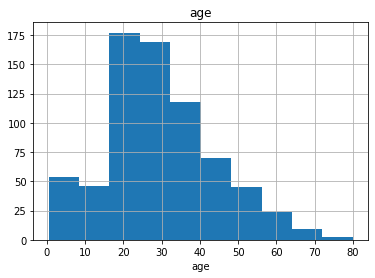

In [51]:
def num_summary(dataframe,col_name,plot=False):
  quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
  print(dataframe[col_name].describe(quantiles).T)
  print("##########################################")
  
  if plot:
    dataframe[col_name].hist()
    plt.xlabel(col_name)
    plt.title(col_name)
    plt.show(block=True)

num_summary(df,"age",plot=True)

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
5%         4.000000
10%       14.000000
20%       19.000000
30%       22.000000
40%       25.000000
50%       28.000000
60%       31.800000
70%       36.000000
80%       41.000000
90%       50.000000
95%       56.000000
99%       65.870000
max       80.000000
Name: age, dtype: float64
##########################################


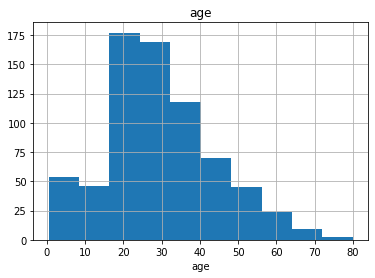

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
5%         7.225000
10%        7.550000
20%        7.854200
30%        8.050000
40%       10.500000
50%       14.454200
60%       21.679200
70%       27.000000
80%       39.687500
90%       77.958300
95%      112.079150
99%      249.006220
max      512.329200
Name: fare, dtype: float64
##########################################


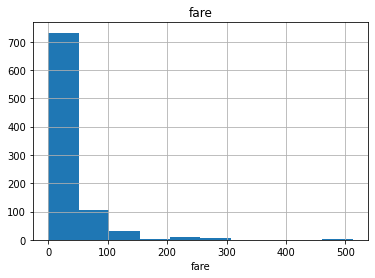

In [53]:
for col in num_cols:
  num_summary(df,col,plot=True)